In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mlrefined_libraries import math_optimization_library as optlib
from sklearn.linear_model import LinearRegression, LogisticRegression
static_plotter = optlib.static_plotter.Visualizer();
import lib.linear_regression as linear
import lib.plot as show
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import torch.nn as nn
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch


In [34]:
def gradientDescent(iter, x, y, w, alpha):
    x_train = x.transpose()
    m,n=np.shape(x)
    for i in range(0, iter):
        pre = np.dot(x, w)
        loss = (pre - y)
        gradient = np.dot(x_train, loss) / m
        w = w - alpha * gradient
        cost = 1.0 / 2 * m * np.sum(np.square(np.dot(x, np.transpose(w)) - y))
        print("epoch: {} loss: {}".format(i,round(cost,2)))
    return w
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plotDecisionRegions(X, y, classifier, test_idx=None, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    yU=np.unique(y)
    for idx, cl in enumerate(np.unique(y)):
        xx=[]
        yy=[]
        for i in range(0,len(y)):
            if y[i]==cl:
                xx.append(X[i][0])
                yy.append(X[i][1])
        plt.scatter(xx,yy,
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)


${7.2}$

(40, 2)
(40, 1)
1.6653345369377347e-17
1.0
accuracy: 0.75
misclassification:10


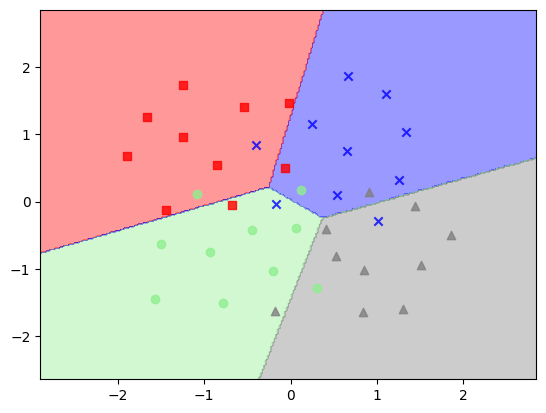

In [35]:
datPath="/Users/xiangyanxin/personal/GraduateCourse/ML/assignment/data/"
csvName=datPath+"4class_data.csv"
data=np.loadtxt(csvName,delimiter = ',')
x=data[:-1,:].T
y=data[-1:,:].T
print(np.shape(x))
print(np.shape(y))
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)
print(np.mean(x))
print(np.var(x))
M=LogisticRegression(C = 1000.0, random_state = 0)
M.fit(x,y)
yPred=M.predict(x)
acc=accuracy_score(y, yPred)
print('accuracy: %.2f' % acc)
print('misclassification:{}'.format(int(len(y)*(1-acc))))
plotDecisionRegions(x,y,classifier=M,test_idx=range(105,150))

${7.3}$

(30, 2)
(30, 1)
-1.258252761241844e-16
1.0
accuracy: 1.00
misclassification:0


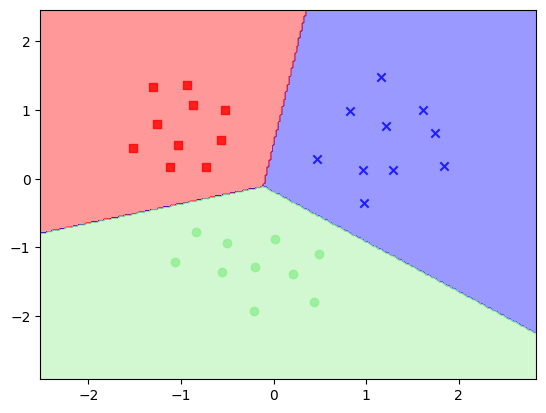

In [36]:
csvName=datPath+'3class_data.csv'
data=np.loadtxt(csvName,delimiter = ',')
x=data[:-1,:].T
y=data[-1:,:].T
print(np.shape(x))
print(np.shape(y))
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)
print(np.mean(x))
print(np.var(x))
M=LogisticRegression(C = 1000.0, random_state = 0)
his=M.fit(x,y)
yPred=M.predict(x)
acc=accuracy_score(y, yPred)
print('accuracy: %.2f' % acc)
print('misclassification:{}'.format(int(len(y)*(1-acc))))
plotDecisionRegions(x,y,classifier=M,test_idx=range(105,150))

${7.4}$

![avator](/Users/xiangyanxin/personal/GraduateCourse/ML/assignment/pic/7-4.png)

${9.2}$

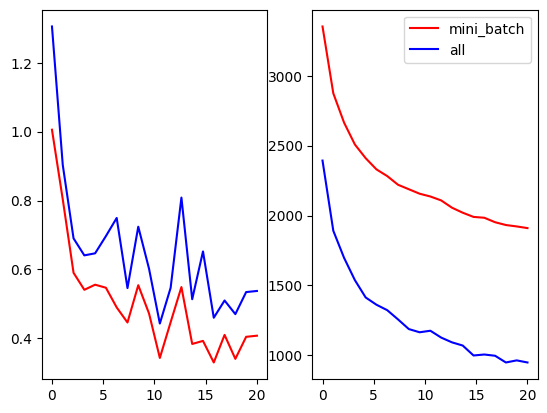

In [71]:
train_dataset = dsets.MNIST(root='/Users/xiangyanxin/personal/GraduateCourse/ML/assignment/data', train=True, transform=transforms.ToTensor(), download=False)
test_dataset = dsets.MNIST(root='./Users/xiangyanxin/personal/GraduateCourse/ML/assignment/data', train=False, transform=transforms.ToTensor(),download=False)
class Model(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs
batch_size = 200
n_iters = 3000
epochs = 20
input_dim = 784
output_dim = 10
lr_rate = 0.01
model = Model(input_dim, output_dim)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
iter = 0
total_loss=[]
total_total_loss=[]
acc=[]
total_total_mis=[]
for epoch in range(20):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    iter+=1
    total_loss.append(loss.item())
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total+= labels.size(0)
        correct+= (predicted == labels).sum()
    accuracy = 100 * correct/total
    acc.append(correct/total)
new_model=Model(input_dim, output_dim)
for epoch in range(20):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = new_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    iter+=1
    total_loss.append(loss.item())
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        outputs = new_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total+= labels.size(0)
        correct+= (predicted == labels).sum()
    accuracy = 100 * correct/total
    acc.append(correct/total)
t=np.linspace(0,20,20)
total_mis=[(1-a)*20000 for a in acc]
plt.subplot(1,2,1)
plt.plot(t,total_loss,color='r',label="mini_batch")
plt.plot(t,total_total_loss,color='b',label="all")
plt.subplot(1,2,2)
plt.plot(t,total_mis,color='r',label="mini_batch")
plt.plot(t,total_total_mis,color='b',label="all")
plt.legend()
plt.show()
